In [4]:
import pandas as pd

url_df = pd.read_csv("Malicious URLs.csv")
url_df.tail(50)

,URLs,Class
333337,picclick.com/?q=Tiny+Tim,good
333338,en.wikipedia.org/wiki/James_Tate,good
333339,spoke.com/info/p6RmTlu/WayneKinde,good
333340,liverpoolecho.co.uk/topics/nels-gym/,good
333341,absoluteastronomy.com/topics/Polish_army_order...,good
333342,nj.com/hudson/voices/index.ssf/2011/09/republi...,good
333343,wowjobs.ca/job/Airport+security+guard-garda-ke...,good
333344,canadianheadstones.com/qc/cemetery_pf.php?cemI...,good
333345,forums.canadian-tv.com/showthread.php?29761-Mu...,good
333346,highwayexplorer.com/EndsPage.php?id=1912&secti...,good


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import re

%matplotlib inline
import tensorflow as tf
loss = tf.keras.losses.SparseCategoricalCrossentropy()

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfTransformer, CountVectorizer

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB

from sklearn.metrics import confusion_matrix, classification_report
import seaborn  as sns

from sklearn.feature_extraction.text import TfidfVectorizer

print("Imported all necessary packages.")


Imported all necessary packages.


In [6]:
test_percentage = .2
train_df, test_df = train_test_split(url_df, test_size=test_percentage, random_state=42)

labels = train_df["Class"]
test_labels = test_df["Class"]

print("Seperated training and test data.")

Seperated training and test data.


Training Samples:  266709
Testing Samples: 66678


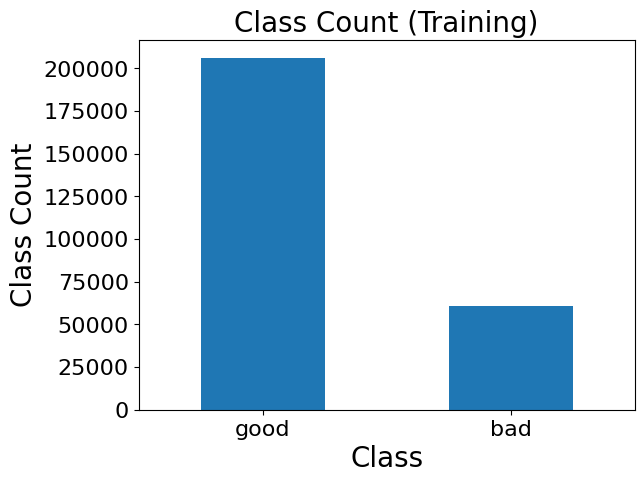

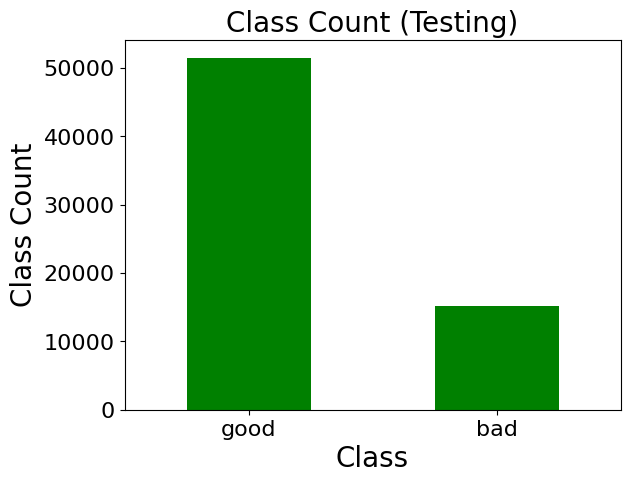

In [7]:
print("Training Samples: ", len(train_df))
print("Testing Samples:", len(test_df))

count_train_classes = pd.Series(train_df["Class"]).value_counts()
count_train_classes.plot(kind="bar", fontsize=16)
plt.title("Class Count (Training)", fontsize=20)
plt.xticks(rotation="horizontal")
plt.xlabel("Class", fontsize=20)
plt.ylabel("Class Count", fontsize=20)

plt.show()

count_test_classes = pd.Series(test_df["Class"]).value_counts()
count_test_classes.plot(kind="bar", fontsize=16, colormap="ocean")
plt.title("Class Count (Testing)", fontsize=20)
plt.xticks(rotation="horizontal")
plt.xlabel("Class", fontsize=20)
plt.ylabel("Class Count", fontsize=20)

plt.show()

In [8]:
def tokenizer(url):

    tokens = re.split("[/-]", url)

    for i in tokens:
        if i.find(".") >= 0:
            dot_split = i.split(".")

            if "com" in dot_split:
                dot_split.remove("com")
            if "www" in dot_split:
                dot_split.remove("www")

            tokens += dot_split
    return tokens
print("Done tokenizer")

Done tokenizer


In [9]:
print("Full URL: ", url_df["URLs"][122751])

tokenized_url = tokenizer(url_df["URLs"][122751])
print("Tokenized URL: ", tokenized_url)

Full URL:  manta.com/c/mtmfx9m/assembly-member-mary-hayashi
Tokenized URL:  ['manta.com', 'c', 'mtmfx9m', 'assembly', 'member', 'mary', 'hayashi', 'manta']


In [10]:
print("Training Count vectorizer.")
cVec = CountVectorizer(tokenizer=tokenizer)
count_x= cVec.fit_transform(train_df["URLs"])

print("Training TF-IDF vectorizer.")
tVec = TfidfVectorizer(tokenizer=tokenizer)
tfidf_x = tVec.fit_transform(train_df['URLs'])

print("Vectorizing Completed.")

Training Count vectorizer.


c:\Users\lmmwe\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


Training TF-IDF vectorizer.
Vectorizing Completed.


In [11]:
print("Test Count Vectorizer.")
test_count_x = cVec.transform(test_df["URLs"])

print("Test TFIDF Vectorizer.")
test_tfidf_x = tVec.transform(test_df["URLs"])

print("Vectorizing Completed.")

Test Count Vectorizer.
Test TFIDF Vectorizer.
Vectorizing Completed.


In [12]:
def generate_report(cmatrix, score, creport):
  """Generates and displays graphical reports
  Keyword arguments:
    cmatrix - Confusion matrix generated by the model
    score --- Score generated by the model
    creport - Classification Report generated by the model

  :Returns -- N/A
  """

  cmatrix = cmatrix.T

  plt.figure(figsize=(122751,122751))
  sns.heatmap(cmatrix,
              annot=True,
              fmt="d",
              linewidths=.5,
              square=True,
              cmap="Blues",
              annot_kws={"size ": 16},
              xticklabels=["bad", "good"],
              yticklabels=["bad", "good"])
  
  plt.xticks(rotation="horizontal", fontsize=16)
  plt.yticks(rotation="horizontal", fontsize=16)
  plt.xlabel("Actual Label", size=20);
  plt.ylabel("Predicted Label", size=20);

  title= "Accuracy Score: {0:.4f}".format(score)
  plt.title(title, size = 20);

  print(creport)
  plt.show()

print("Report Generator.")

Report Generator.


In [13]:
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical
import numpy as np

le = LabelEncoder()
labels = le.fit_transform(train_df['Class'])
test_labels =le.fit_transform(test_df['Class'])

ytrain = to_categorical(labels)
ytest = to_categorical(test_labels)


xtrain = np.array(tfidf_x)
xtest = np.array(test_tfidf_x)

In [14]:
from sklearn.ensemble import RandomForestClassifier 

mnb_tfidf = RandomForestClassifier()
mnb_tfidf.fit(tfidf_x, labels)

RandomForestClassifier()

In [15]:
score = mnb_tfidf.score(test_tfidf_x, test_labels)

print("Accuracy: ", score)

Accuracy:  0.9574222382195027


In [30]:
import scipy.sparse as sp

def adversial_samples(x, model, epsilon=0.00001):
    noise = sp.random(x.shape[0], x.shape[1], density=epsilon)
    adversarial_example = x + noise
    
    return adversarial_example

In [35]:
import numpy as np
import scipy.sparse as sp

def adversarial_samples(x, epsilon=0.00001):
    max_noise = epsilon * np.max(x.data)
    # Generate noise with the same shape as x
    noise = sp.random(x.shape[0], x.shape[1], density=epsilon, data_rvs=lambda shape: np.random.uniform(-max_noise, max_noise, shape))
    # Add the noise to the original input
    adversarial_example = x + noise
    return adversarial_example

subset_size = 1000

adversarial_test_tfidf_x_subset = adversarial_samples(test_tfidf_x[:subset_size])

# Evaluate the model's performance on the subset of adversarial samples
adversarial_score_subset = mnb_tfidf.score(adversarial_test_tfidf_x_subset, test_labels[:subset_size])
print('Accuracy on subset of adversarial samples:', adversarial_score_subset)

print("Adversarial Subset elements:")
for element in adversarial_test_tfidf_x_subset:
  print(element)

Accuracy on subset of adversarial samples: 0.965
Adversarial Subset elements:
  (0, 382644)	5.964648379914253e-06
  (0, 374425)	8.001776130521324e-06
  (0, 310544)	2.1057983906032726e-06
  (0, 0)	0.41001516435226976
  (0, 110170)	0.9120787054860897
  (0, 271747)	3.1052774495476216e-06
  (0, 200779)	9.915362388466397e-06
  (0, 410647)	0.691167748532459
  (0, 421352)	0.46583000836439076
  (0, 421353)	0.5525301319347239
  (0, 196575)	6.543803838303934e-06
  (0, 190318)	-4.517216858104332e-06
  (0, 111222)	-2.7465994496375034e-06
  (0, 0)	0.17638902729043515
  (0, 443675)	0.9843205326780164
  (0, 451881)	-9.145619274131949e-06
  (0, 319936)	3.1278098801456e-06
  (0, 317041)	-2.164414037787135e-06
  (0, 313317)	5.218872102770018e-07
  (0, 269038)	-4.490067152199524e-06
  (0, 133553)	9.850230919017862e-06
  (0, 55260)	-4.561665610954087e-06
  (0, 43255)	-5.477458793627854e-06
  (0, 7340)	-7.968814430869274e-06
  (0, 0)	0.09743945453537463
  (0, 91805)	0.27468813880120435
  (0, 169267)	0.4504

In [32]:
accuracy = mnb_tfidf.score(test_tfidf_x, test_labels)
print('Accuracy:', accuracy)

Accuracy: 0.9574222382195027


In [36]:
def url_from_tokens(tokens):
    url_parts = []
    for token in tokens:
        if isinstance(token, str):
            url_parts.append(token)
        elif isinstance(token, np.ndarray):
            # Convert the numpy array to string
            url_parts.append(token.toarray().flatten()[0])
        else:
            # Handle other cases, if any
            pass
    return ''.join(url_parts)

In [37]:
def craft_adversarial_url(url, adversarial_subset, tokenizer, url_from_tokens):

  # Tokenize the original URL
  tokens = tokenizer(url)
  print("Tokens after tokenizer:", tokens)

  # Insert the adversarial subset into the tokens at specific locations
  insertion_points = [2, 4]  # Example insertion points (modify as needed)
  for i, point in enumerate(insertion_points):
    tokens.insert(point + i, adversarial_subset[i])

  # Print data type of each element in tokens after insertion
  for i, token in enumerate(tokens):
    print(f"Type of token {i}:", type(token))

  # Reconstruct the URL from the modified tokens
  adversarial_url = url_from_tokens(tokens)

  return adversarial_url

# Get the adversarial subset
adversarial_subset = adversarial_test_tfidf_x_subset[0].toarray()[0]  # Assuming the subset is a sparse matrix

# Reconstruct the adversarial URL from the original URL and the subset
original_url = url_df["URLs"][122751]
adversarial_url = craft_adversarial_url(original_url, adversarial_test_tfidf_x_subset, tokenizer, url_from_tokens)

print("Original URL:", original_url)
# "/" Will have to be added manually so as to much the original.
print("Reconstructed Adversarial URL:", adversarial_url)

Tokens after tokenizer: ['manta.com', 'c', 'mtmfx9m', 'assembly', 'member', 'mary', 'hayashi', 'manta']
Type of token 0: <class 'str'>
Type of token 1: <class 'str'>
Type of token 2: <class 'scipy.sparse._csr.csr_matrix'>
Type of token 3: <class 'str'>
Type of token 4: <class 'str'>
Type of token 5: <class 'scipy.sparse._csr.csr_matrix'>
Type of token 6: <class 'str'>
Type of token 7: <class 'str'>
Type of token 8: <class 'str'>
Type of token 9: <class 'str'>
Original URL: manta.com/c/mtmfx9m/assembly-member-mary-hayashi
Reconstructed Adversarial URL: manta.comcmtmfx9massemblymembermaryhayashimanta
